Divided Diff:  [[2.0, 6.0, 10.0, 14.0], [1.0, 1.0, 1.0], [0.0, 0.0]]
[[5, np.int64(20), np.int64(120)], [np.int64(20), np.int64(120), np.int64(800)], [np.int64(120), np.int64(800), np.int64(5664)]]
[np.int64(120), np.int64(800), np.int64(5664)]
0.0 + 0.0 x + 1.0 x**2
Least Square is: 0.0


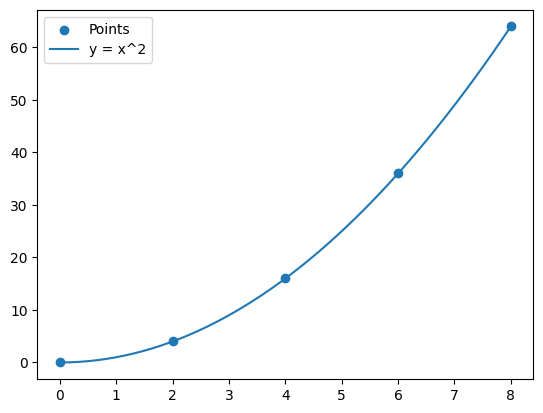

In [ ]:
from scipy.linalg import solve
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import pandas as pd
from utils import divided_diff

x = [0 ,2, 4, 6, 8]
y = [0, 4, 16, 36, 64]

print("Divided Diff: ", divided_diff(x,y))

# a, b, c
A = [
    [len(x), np.sum(x), np.sum(np.square(x))],
    [np.sum(x), np.sum(np.square(x)), np.sum(np.pow(x, 3))],
    [np.sum(np.square(x)), np.sum(np.pow(x, 3)), np.sum(np.pow(x, 4))],
]

b = [
    np.sum(y), 
    np.sum(np.multiply(x,y)), 
    np.sum( 
        np.multiply(np.square(x), y)
    )
]
print(A)
print(b)


coef = solve(A, b)
poly = Polynomial(coef=coef)
print(poly)
print(f"Least Square Error is: {np.sum(np.square(np.subtract(y, poly(x))))}")

space = np.linspace(min(x), max(x))
plt.scatter(x, y, label="Points")
plt.plot(space, poly(space), label="y = x^2")
plt.legend()
plt.show()
